In [1]:
from qutip import *
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import gc

N = 24

Jx_Xedge = 1.0
Jy_Xedge = 1.0
Jz_Xedge = 1.0
Jx_Yedge = 1.0
Jy_Yedge = 1.0
Jz_Yedge = 1.0
Jx_Zedge = 1.0
Jy_Zedge = 1.0
Jz_Zedge = 1.0

Xedges = [[1, 3], [2, 6], [7, 9], [5, 10], [8, 12], [11, 15], [13, 17], [14, 18], [16, 20], [19, 22], [0, 21], [4, 23]]
Yedges = [[0, 1], [2, 4], [3, 7], [6, 8], [10, 11], [12, 13], [15, 16], [18, 19], [20, 21], [22, 23], [5, 9], [14, 17]]
Zedges = [[0, 2], [4, 5], [3, 8], [6, 11], [9, 13], [10, 14], [12, 16], [15, 19], [17, 21], [20, 23], [7, 22], [1, 18]]

def make_op(index, type_op, N):
    op_list = [qeye(2) for _ in range(N)]
    if type_op == 'x':
        op_list[index] = sigmax()
    elif type_op == 'y':
        op_list[index] = sigmay()
    elif type_op == 'z':
        op_list[index] = sigmaz()
    return tensor(op_list)

H = 0

for i,j in Xedges:
    H += Jx_Xedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Xedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Xedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

for i,j in Yedges:
    H += Jx_Yedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Yedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Yedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

for i,j in Zedges:
    H += Jx_Zedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Zedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Zedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

In [2]:
evals, evecs = H.eigenstates(sparse=True, sort='low', eigvals=1, maxiter=1000, tol=1e-8)

In [3]:
evals[0]

np.complex128(-53.32025509451364+1.2576372516639553e-16j)

In [10]:
from qutip import *
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import gc

N = 14

J1, J2, J3, J4, J5, J6 = 0.012, 0.694, 0.971, 1.000, 0.894, 0.182
Junit = 170.0
gmuB = 1.0 / 0.086 * 0.05788 * 2.0

J1edges = [[1,6],[2,5],[3,6],[4,12],[8,13],[9,12],[10,13],[11,5]]
J2edges = [[1,2], [2,3], [3,4], [4,1],[8,9],[9,10],[10,11],[11,8]]
J3edges = [[2,6],[1,12],[4,6],[3,5],[9,13],[8,5],[11,13],[10,12]]
J4edges = [[1,3],[2,4],[8,10],[9,11]]
J5edges = [[1,7],[2,7],[3,7],[4,7],[8,14],[9,14],[10,14],[11,14]]
J6edges = [[6,12],[6,12],[5,6],[5,6],[5,13],[5,13],[12,13],[12,13]]

def make_op(index, type_op, N):
    op_list = [qeye(2) for _ in range(N)]
    if type_op == 'x':
        op_list[index] = sigmax()
    elif type_op == 'y':
        op_list[index] = sigmay()
    elif type_op == 'z':
        op_list[index] = sigmaz()
    return tensor(op_list)

H1x = 0
H1y = 0
H1z = 0

for i in range(N):
    H1x += make_op(i, "x", N)
    H1y += make_op(i, "y", N)
    H1z += make_op(i, "z", N)

    gc.collect()

H2 = 0

def addtermtoH2(J, edges):
    global H2
    for i,j in edges:
        H2 += J * Junit * make_op(i-1, "x", N) * make_op(j-1, "x", N)
        H2 += J * Junit * make_op(i-1, "y", N) * make_op(j-1, "y", N)
        H2 += J * Junit * make_op(i-1, "z", N) * make_op(j-1, "z", N)
        gc.collect()

addtermtoH2(J1, J1edges)
addtermtoH2(J2, J2edges)
addtermtoH2(J3, J3edges)
addtermtoH2(J4, J4edges)
addtermtoH2(J5, J5edges)
addtermtoH2(J6, J6edges)

def Hcurrent(Bx, By, Bz):
    return H2 - (Bx * gmuB) * H1x - (By * gmuB) * H1y - (Bz * gmuB) * H1z

In [ ]:
Bz = np.linspace(0, 400, 1001)
Energy_ground = []
TotalMagnetization_ground = []

for b in tqdm(Bz):
    evals, evecs = Hcurrent(Bx=0, By=0, Bz=b).eigenstates(sparse=True, sort='low', eigvals=1, maxiter=1000, tol=1e-8)
    Energy_ground.append(evals[0].real)

    val = 0
    for i in range(N):
        val += expect(make_op(i, "z", N), evecs[0])
        gc.collect()
    
    TotalMagnetization_ground.append(val)


In [4]:
TotalMagnetization_per_7nodes = [x/2.0 for x in TotalMagnetization_ground]

In [ ]:
with open('TotalMagnetization_per_7nodes.txt', 'w') as file:
    for i in range(len(Bz)):
        file.write(str(Bz[i]) + "\t" + str(TotalMagnetization_per_7nodes[i]) + "\n")

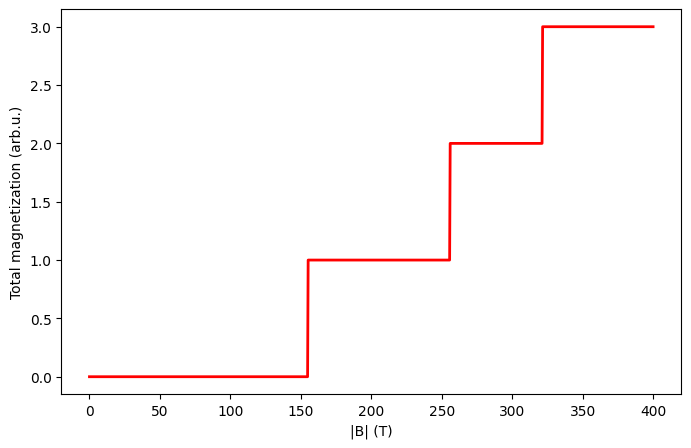

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(Bz, TotalMagnetization_per_7nodes, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Total magnetization (arb.u.)')
plt.show()

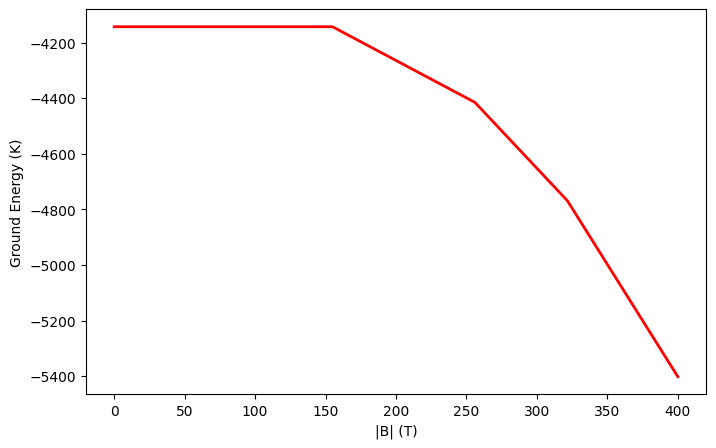

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(Bz, Energy_ground, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Ground Energy (K)')
plt.show()